In [1]:
#Setting up like previous notebooks
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-26 03:27:17.859901: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 03:27:18.093945: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 03:27:18.094279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 03:27:18.140497: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 03:27:18.263825: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-26 03:27:18.266489: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
import custom_module as cc #My custom module

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255) #Applying normalization, here.
valid_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_dataset = cc.data_loader(train_datagen,'archive (13)/Data/train/')
valid_dataset = cc.data_loader(valid_datagen,'archive (13)/Data/valid/')

Found 404 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


### Training. No Augmentation

In [7]:
import keras
eff_model = keras.applications.EfficientNetB0(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)

21834768/21834768 [==============================] - 5s 0us/step


In [8]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

output = Dense(4, activation='softmax')(eff_model.output)

model = Model(inputs=eff_model.input, outputs=output)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_dataset,
                    epochs=5,   
                    batch_size=32, 
                    validation_data=valid_dataset)

Epoch 1/5
4/4 [==============================] - 39s 6s/step - loss: 1.3849 - accuracy: 0.3094 - val_loss: 1.3867 - val_accuracy: 0.1806
Epoch 2/5
4/4 [==============================] - 21s 7s/step - loss: 1.3642 - accuracy: 0.6708 - val_loss: 1.3863 - val_accuracy: 0.2917
Epoch 3/5
4/4 [==============================] - 21s 4s/step - loss: 1.3515 - accuracy: 0.7475 - val_loss: 1.3861 - val_accuracy: 0.2917
Epoch 4/5
4/4 [==============================] - 19s 4s/step - loss: 1.3386 - accuracy: 0.7921 - val_loss: 1.3862 - val_accuracy: 0.2917
Epoch 5/5
4/4 [==============================] - 21s 5s/step - loss: 1.3275 - accuracy: 0.8317 - val_loss: 1.3864 - val_accuracy: 0.2917


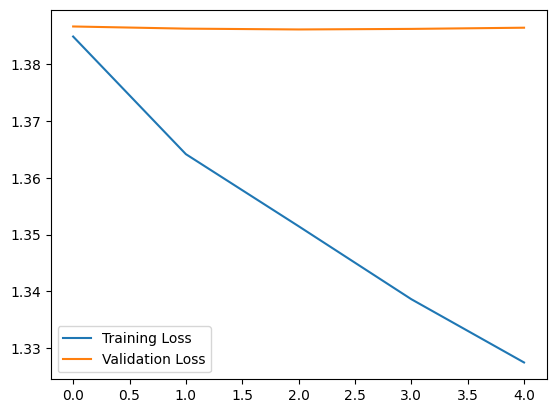

In [10]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

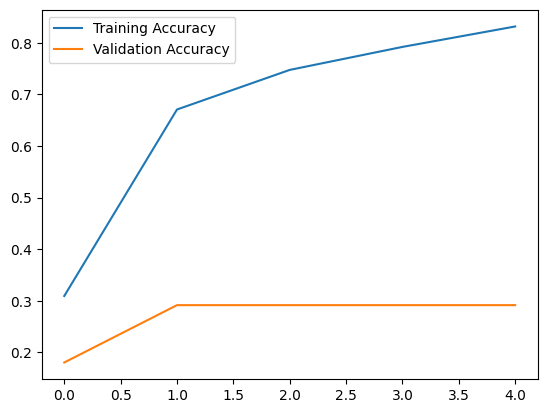

In [11]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training Accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

In [12]:
#This one did better!
model.save('Models/BaseModel_3.keras')